In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("D:\\Data Science\\Datasets\\Machine learning\\Projects for Submission\\Project 1 - Mercedes-Benz Greener Manufacturing\\Dataset for the project\\train.csv")

In [4]:
data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [7]:
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [8]:
pal = sns.color_palette()

min: 72.11 max: 265.32 mean: 100.66931812782134 std: 12.6778749695168
Count of values above 180: 1


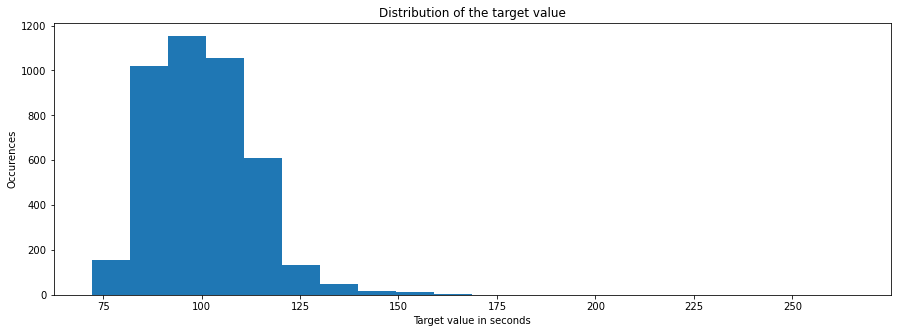

In [13]:
y_train = data['y'].values
plt.figure(figsize=(15, 5))
plt.hist(y_train, bins=20)
plt.xlabel('Target value in seconds')
plt.ylabel('Occurences')
plt.title('Distribution of the target value')

print('min: {} max: {} mean: {} std: {}'.format(min(y_train),
                                                max(y_train), 
                                                y_train.mean(), 
                                                y_train.std()))
print('Count of values above 180: {}'.format(np.sum(y_train > 200)))

So we have a pretty standard distribution here, which is centred around almost exactly 100. Nothing special to note here, except there is a single outlier at 265 seconds where every other value is below 180.

The fact that our ID is not equal to the row ID seems to suggest that the train and test sets were randomly sampled from the same dataset, which could have some special order to it, for example a time series. Let's take a look at how this target value changes over time in order to understand whether we're given time series data.

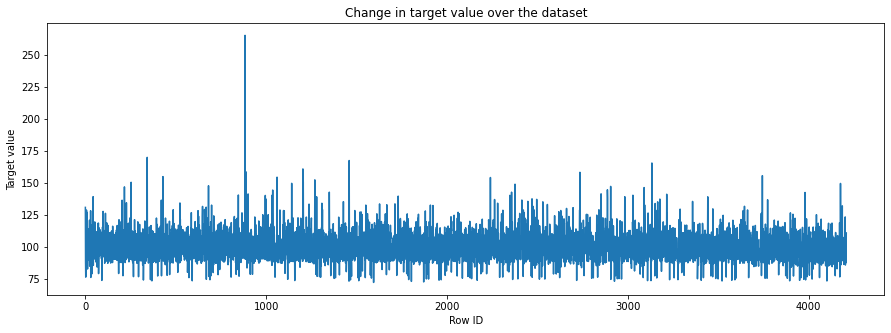

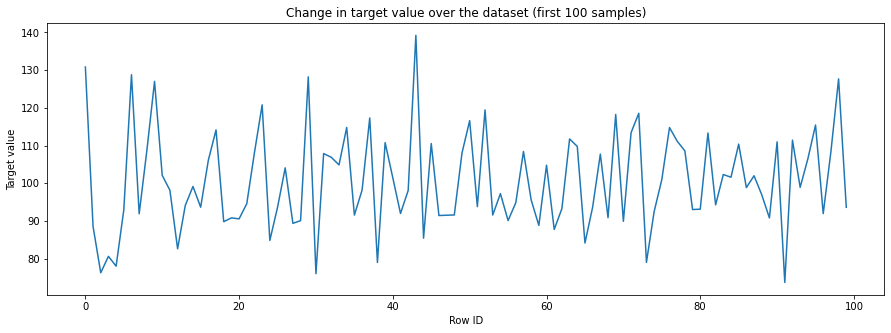

In [15]:
plt.figure(figsize=(15, 5))
plt.plot(y_train)
plt.xlabel('Row ID')
plt.ylabel('Target value')
plt.title('Change in target value over the dataset')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(y_train[:100])
plt.xlabel('Row ID')
plt.ylabel('Target value')
plt.title('Change in target value over the dataset (first 100 samples)')
print()

At first glance, there doesn't seem to be anything overly suspicious here - looks like how a random sort would. I might take a closer look later but for now let's move on to the features.

# Feature analysis

In [18]:
cols = [c for c in data.columns if 'X' in c]
print('Number of features: {}'.format(len(cols)))

print('Feature types:')
data[cols].dtypes.value_counts()

Number of features: 376
Feature types:


int64     368
object      8
dtype: int64

So out of all our features, we are given 8 object (likely a string) variables, 368 integer variables. What about the cardinality of our features?

In [20]:
counts = [[], [], []]
for c in cols:
    typ = data[c].dtype
    uniq = len(np.unique(data[c]))
    if uniq == 1: counts[0].append(c)
    elif uniq == 2 and typ == np.int64: counts[1].append(c)
    else: counts[2].append(c)

print('Constant features: {} Binary features: {} Categorical features: {}\n'.format(*[len(c) for c in counts]))

print('Constant features:', counts[0])
print('Categorical features:', counts[2])

Constant features: 12 Binary features: 356 Categorical features: 8

Constant features: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']
Categorical features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


Interestingly, we have 12 features which only have a single value in them - these are pretty useless for supervised algorithms, and should probably be dropped (unless you want to use them for anomaly detection in case a different value appears in the test set)

The rest of our dataset is made up of many binary features, and a few categorical features.

In [21]:
binary_means = [np.mean(data[c]) for c in counts[1]]
binary_names = np.array(counts[1])[np.argsort(binary_means)]
binary_means = np.sort(binary_means)

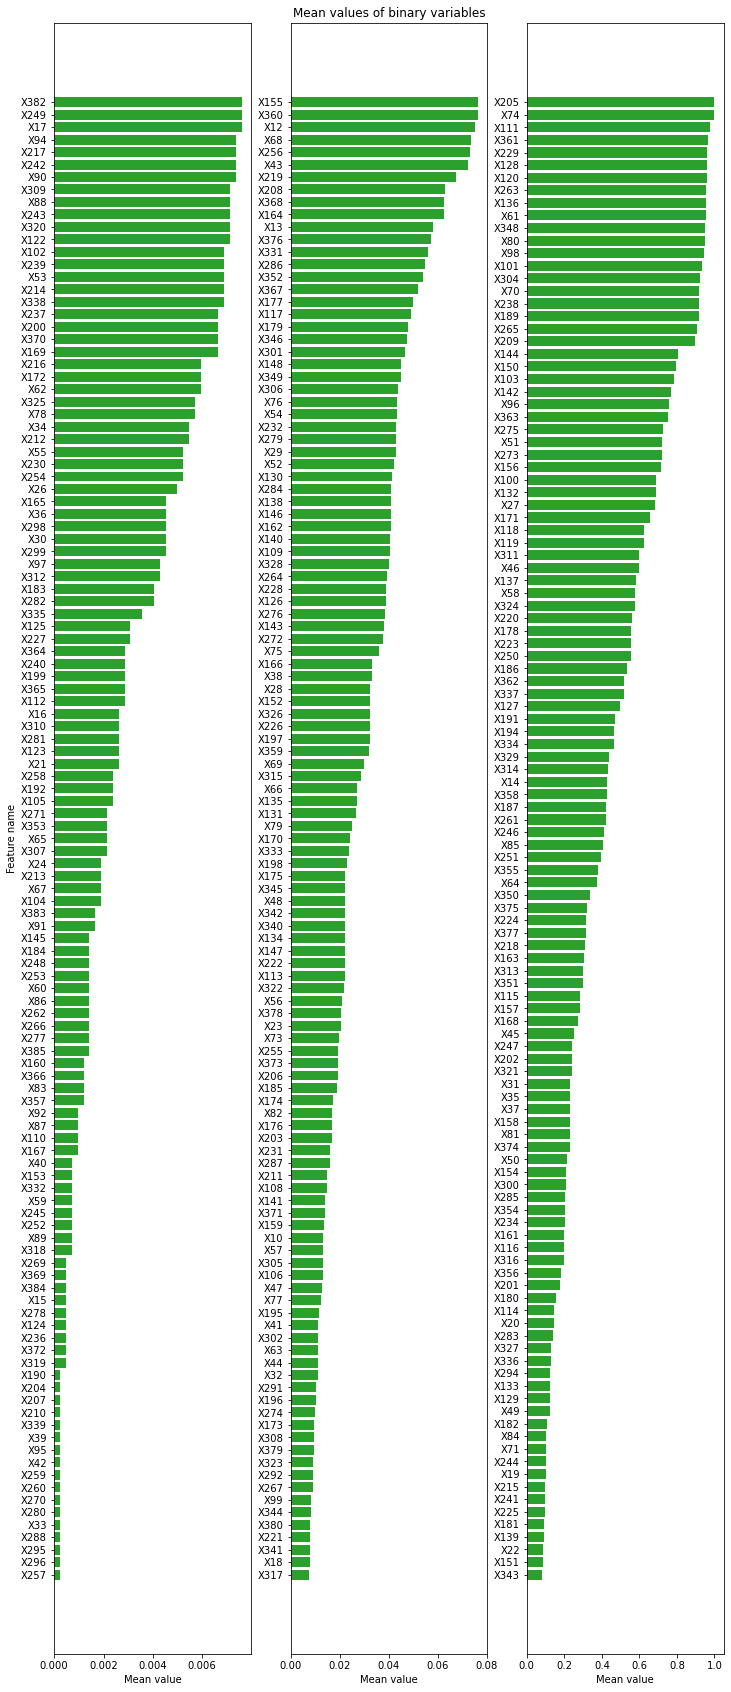

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(12,30))
ax[0].set_ylabel('Feature name')
ax[1].set_title('Mean values of binary variables')
for i in range(3):
    names, means = binary_names[i*119:(i+1)*119], binary_means[i*119:(i+1)*119]
    ax[i].barh(range(len(means)), means, color=pal[2])
    ax[i].set_xlabel('Mean value')
    ax[i].set_yticks(range(len(means)))
    ax[i].set_yticklabels(names, rotation='horizontal')
plt.show()

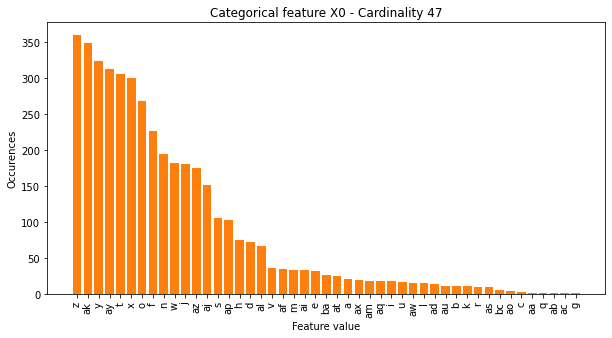

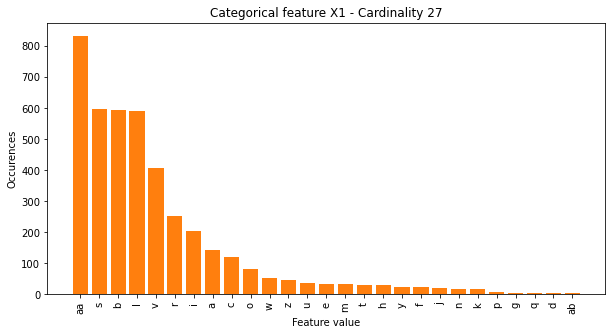

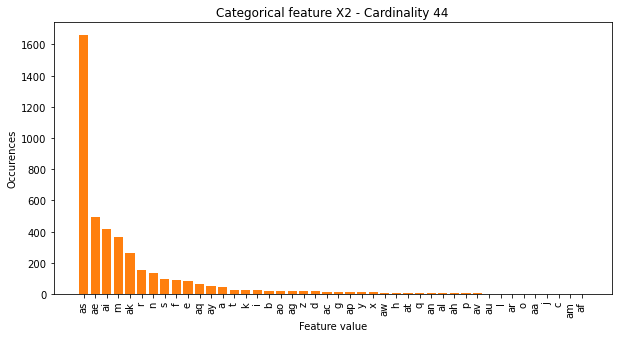

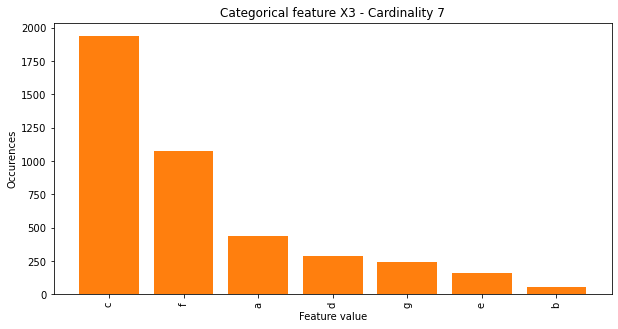

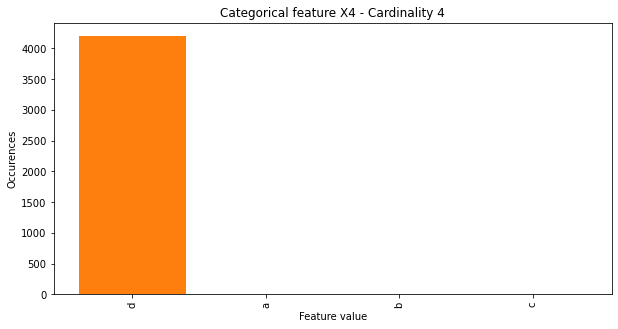

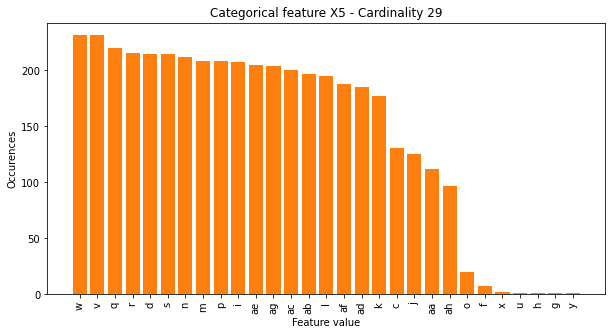

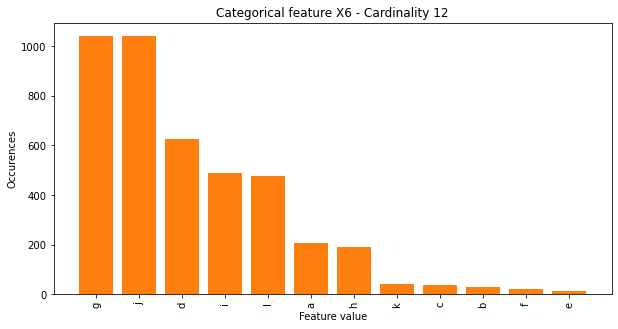

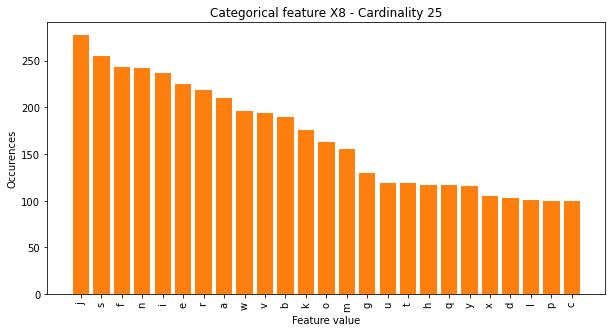

In [23]:
for c in counts[2]:
    value_counts = data[c].value_counts()
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title('Categorical feature {} - Cardinality {}'.format(c, len(np.unique(data[c]))))
    plt.xlabel('Feature value')
    plt.ylabel('Occurences')
    plt.bar(range(len(value_counts)), value_counts.values, color=pal[1])
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation='vertical')
    plt.show()


In [24]:
test = pd.read_csv("D:\\Data Science\\Datasets\\Machine learning\\Projects for Submission\\Project 1 - Mercedes-Benz Greener Manufacturing\Dataset for the project\\test.csv")

In [25]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [27]:
usable_columns = list(set(data.columns) - set(['ID', 'y']))

y_train = data['y'].values
id_test = test['ID'].values

x_train = data[usable_columns]
x_test = test[usable_columns]

for column in usable_columns:
    cardinality = len(np.unique(x_train[column]))
    if cardinality == 1:
        x_train.drop(column, axis=1) # Column with only one value is useless so we drop it
        x_test.drop(column, axis=1)
    if cardinality > 2: # Column is categorical
        mapper = lambda x: sum([ord(digit) for digit in x])
        x_train[column] = x_train[column].apply(mapper)
        x_test[column] = x_test[column].apply(mapper)
        
x_train.head()

,X199,X346,X352,X281,X0,X187,X182,X324,X263,X266,...,X158,X75,X81,X10,X207,X276,X122,X327,X333,X296
0,0,0,0,0,107,1,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,107,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,219,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
3,0,0,0,0,219,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,219,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


# XGBoost

In [28]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(x_test)

params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[13:02:08] WARNING: d:\bld\xgboost-split_1631904903843\work\src\objective\regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:99.13972	train-r2:-58.34264	valid-rmse:98.25375	valid-r2:-67.62468
[10]	train-rmse:81.18322	train-r2:-38.79276	valid-rmse:80.27140	valid-r2:-44.80403
[20]	train-rmse:66.54102	train-r2:-25.73316	valid-rmse:65.59669	valid-r2:-29.58764
[30]	train-rmse:54.61490	train-r2:-17.00917	valid-rmse:53.63052	valid-r2:-19.44589
[40]	train-rmse:44.91724	train-r2:-11.18141	valid-rmse:43.88424	valid-r2:-12.68986
[50]	train-rmse:37.05078	train-r2:-7.28831	valid-rmse:35.95870	valid-r2:-8.19158
[60]	train-rmse:30.69125	train-r2:-4.68723	valid-rmse:29.52892	valid-r2:-5.19837
[70]	train-rmse:25.57453	train-r2:-2.94900	valid-rmse:24.33419	valid-r2:-3.20936
[80]	train-rmse:21.48437	train-r2:-1.78687	valid-rmse:20.16220	valid-r2:-1.88973
[90]	train-rmse:18.24274	train-r2:-1.00933	valid-rmse:16.84375	valid-r2:-1.01679
[100]	train-rmse:15.70223

In [29]:
p_test = clf.predict(d_test)

sub = pd.DataFrame()
sub['ID'] = id_test
sub['y'] = p_test
sub.to_csv('xgb.csv', index=False)

In [30]:
sub.head()

,ID,y
0,1,89.938347
1,2,105.661949
2,3,90.326126
3,4,77.473091
4,5,111.201210
